In [31]:
import numpy as np
import h5py as hp
import sys
import PyHEADTAIL
import seaborn as sbs
import PyNAFF as pnf
from postprocessing_funcs import *
from matplotlib import pyplot as plt
import matplotlib

In [46]:
sbs.set(rc={'figure.figsize':(8.3,5.2),
            'text.usetex':True,
           'font.family':'serif',
           'font.size':20,
           'axes.linewidth':2,
           'lines.linewidth':3,
           'legend.fontsize':16,
           'legend.numpoints':1,},
        style='white',
        palette='colorblind',
        context='talk')

In [53]:
# folder = '/home/vgubaidulin/PhD/Data/Stability_scans/pelens_test/'
folder = '/home/vgubaidulin/PhD/Data_server/Stability_scans/FCC/octupole_test/'

real = 0.0
imag = 0.000
x, xp = get_particles_data(real, imag, folder)
y, yp = get_particles_data(real, imag, folder, is_plane_x=False)
print(x.shape, y.shape)

(8192, 4096) (8192, 4096)


In [54]:
%%time
Q_x, Q_y = get_tunes(x[:], y[:])

CPU times: user 1min 4s, sys: 6.92 ms, total: 1min 4s
Wall time: 1min 4s


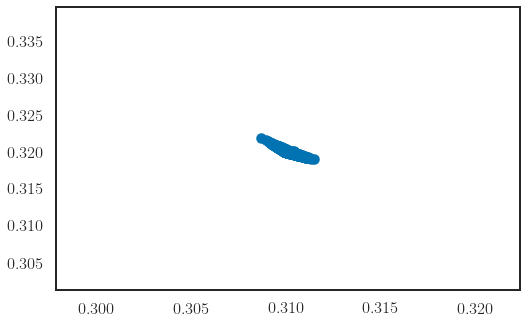

In [55]:
plt.scatter(Q_x, Q_y)
plt.show()

In [56]:
dQcoh_real = 1e-3*np.linspace(-0.8, 0.6, 29)
print(dQcoh_real)

[-8.00000000e-04 -7.50000000e-04 -7.00000000e-04 -6.50000000e-04
 -6.00000000e-04 -5.50000000e-04 -5.00000000e-04 -4.50000000e-04
 -4.00000000e-04 -3.50000000e-04 -3.00000000e-04 -2.50000000e-04
 -2.00000000e-04 -1.50000000e-04 -1.00000000e-04 -5.00000000e-05
 -1.11022302e-19  5.00000000e-05  1.00000000e-04  1.50000000e-04
  2.00000000e-04  2.50000000e-04  3.00000000e-04  3.50000000e-04
  4.00000000e-04  4.50000000e-04  5.00000000e-04  5.50000000e-04
  6.00000000e-04]


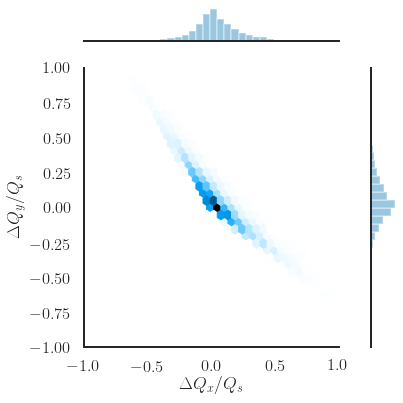

In [59]:
ax = sbs.jointplot((Q_x-0.31)/1e-3, (Q_y-0.32)/1e-3, kind='hex', xlim=(-1, 1), ylim=(-1, 1))
ax.ax_joint.set_xlabel(r'$\Delta Q_x / Q_s$')
ax.ax_joint.set_ylabel(r'$\Delta Q_y / Q_s$')
plt.tight_layout()
# plt.savefig('/home/vgubaidulin/PhD/Results/Tune_spreads/FCC/SC_spread.png')
# plt.savefig('/home/vgubaidulin/PhD/Results/Tune_spreads/FCC/SC_spread.svg')
plt.show()

In [58]:
print(min(Q_x-0.31)/1e-3)

-1.2929489699181618


CPU times: user 1min 12s, sys: 7.76 s, total: 1min 20s
Wall time: 2min 54s


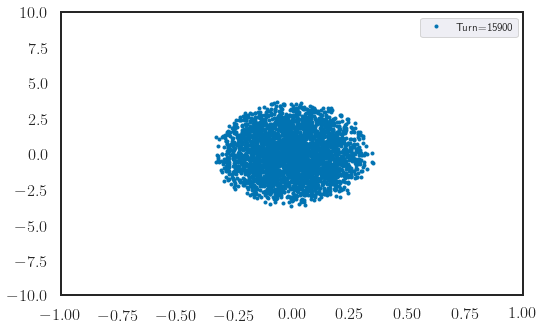

In [39]:
%%time
from matplotlib import animation, rc
from IPython.display import HTML
Writer = animation.writers['ffmpeg']
writer = Writer(fps=4, metadata=dict(artist='Me'), bitrate=1800)
fig, ax = plt.subplots()
sbs.set(rc={'figure.figsize':(8.3, 5.2)}, style='darkgrid', palette='colorblind', context='notebook')

line, = ax.plot([], [], marker='.', ls='')
# initialization function: plot the background of each frame
matplotlib.rcParams['animation.embed_limit'] = 2**128
def init():
#     ax.set_ylim(min(xp[:,0]), max(xp[:,0]))
#     ax.set_xlim(min(x[:,0]), max(x[:,0]))
    ax.set_ylim(-10, 10)
    ax.set_xlim(-1.0, 1.0)
    X = x[:,0]/1e-3
    Y = xp[:,0]/1e-6
    line.set_data(X, Y)
    return (line,)
def animate(i):
    line.set_data(x[:,i]/1e-3, xp[:,i]/1e-6)
    plt.legend((r'Turn={:4d}'.format(i),))
    return (line, )
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=range(0, 16000, 100), interval=500, blit=True)
anim.save('/home/vgubaidulin/PhD/Results/im.mp4', writer=writer)
HTML(anim.to_html5_video())